In [1]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [2]:
# User-define Variables and Setup
import warnings
warnings.filterwarnings("ignore")

WorkingDir = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)"
WorkingDir += "\\2. Labs\\AI Specialist Lesson 05"

os.chdir(WorkingDir)
checkPath = %pwd
print(checkPath)

D:\TUANTA\VTC Academiy\AI VTCA Teaching Materials\Short-Course AI\4. AI Specialist(AI Engineer)\2. Labs\AI Specialist Lesson 05


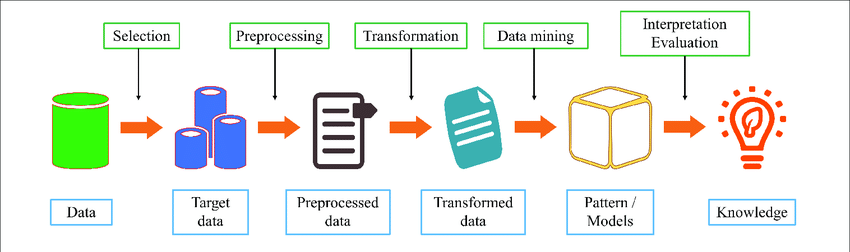

In [3]:
display(Image(filename='Data Mining Process 01.png'))

In [4]:
# !pip install category-encoders

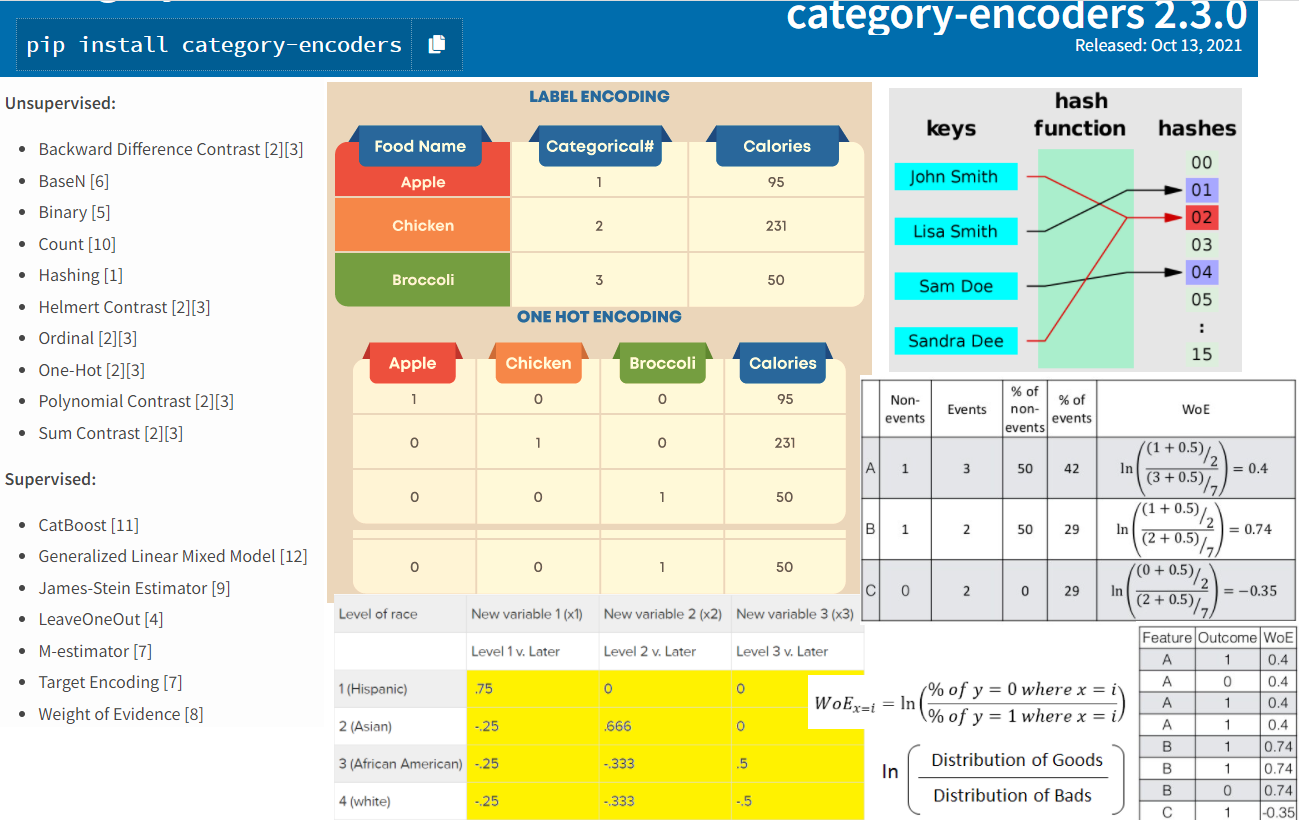

In [5]:
display(Image(filename='Feature Encoding.png'))

In [6]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [7]:
# display the all columns 
pd.set_option('display.max_columns',None)

In [8]:
data = pd.read_csv('TelecomCustomerChurn.csv')

display(data.head())
print(data.shape)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


(4250, 20)


In [9]:
# describe the five points of statistics of numericals data
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
# Describe the string data
data.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [11]:
# Univariate Analysis
# 1. Categorical Variables
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [12]:
# extract the categorical variables
cat_var = [ feature for feature in data.columns if data[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


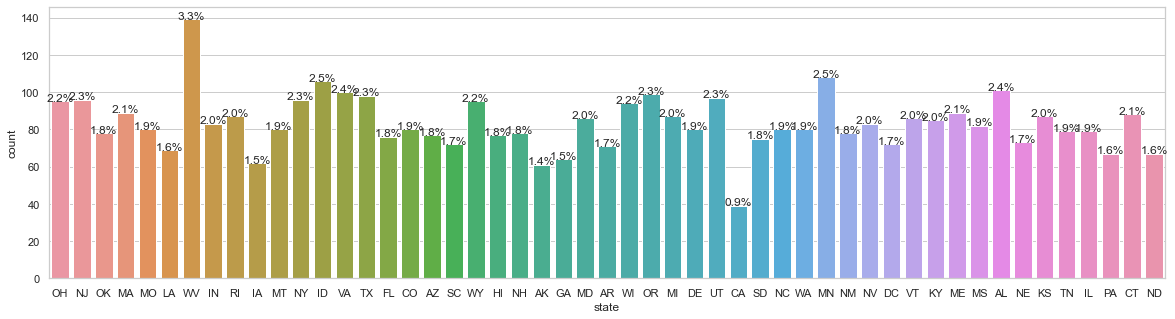

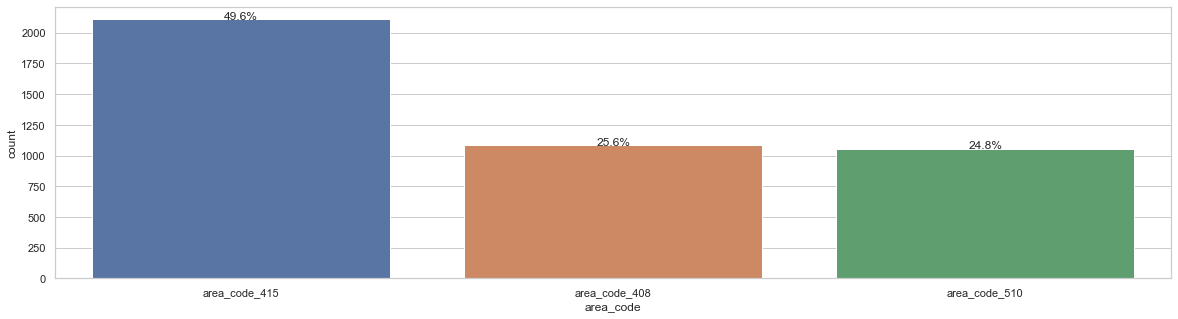

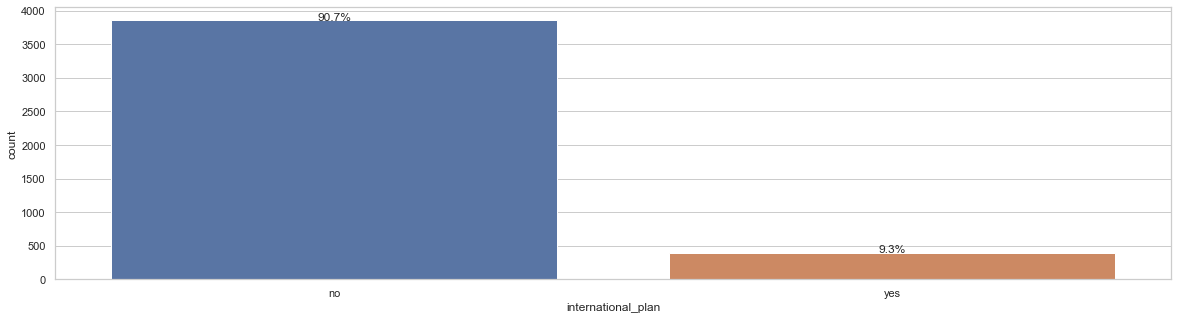

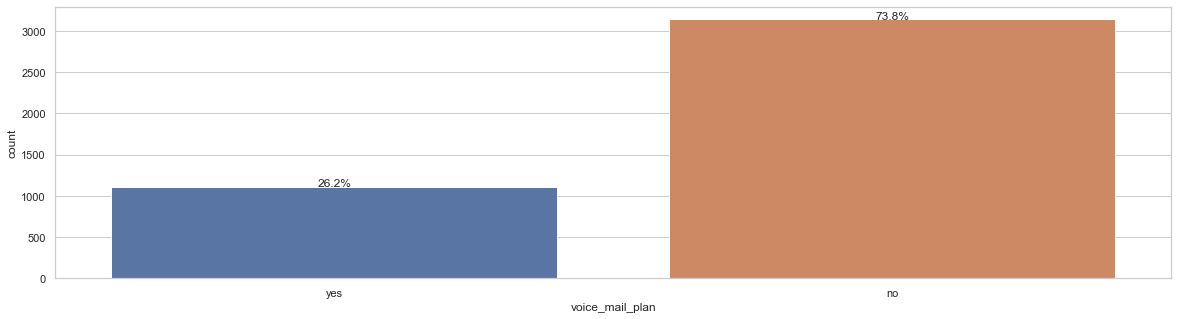

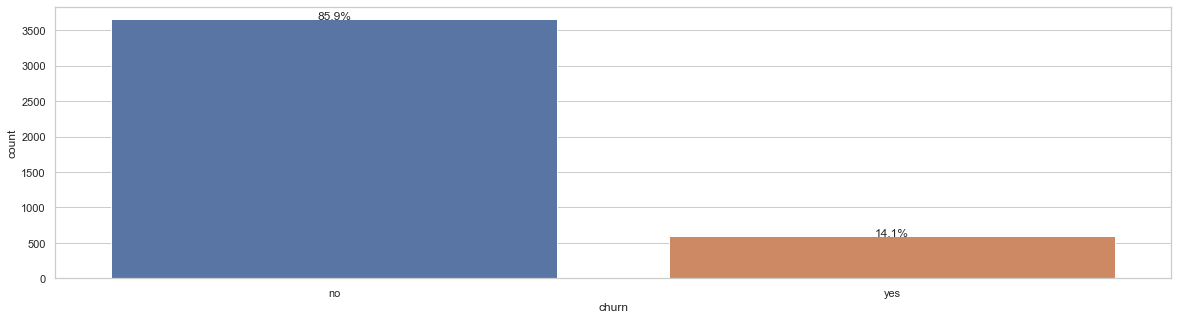

In [13]:
#display the all the categorical variable 
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(data)
    ax = sns.countplot(x = data[feature], data = data)
    with_per(total, ax)
    plt.show()

In [14]:
# See the above plot
# 90.7% customers didn't have international plan
# 73.8% customers didn't have voice mail plan
# 49.6% customers are living in the area code area_code_415.
# only 14.1% customers are churn

In [15]:
# 2. Numerical Variables
#Extract the numerical features from the dataset
num_var = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


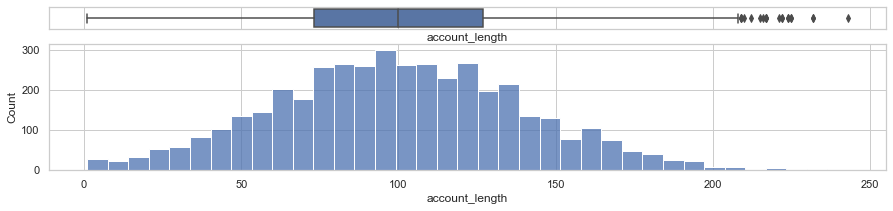

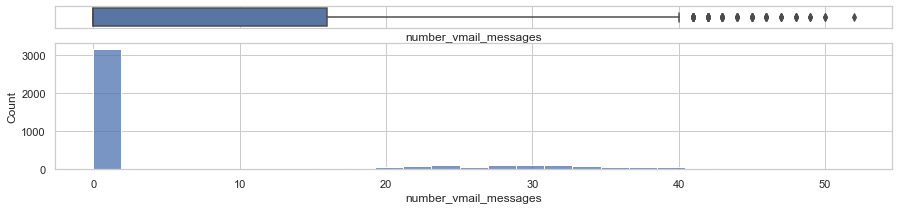

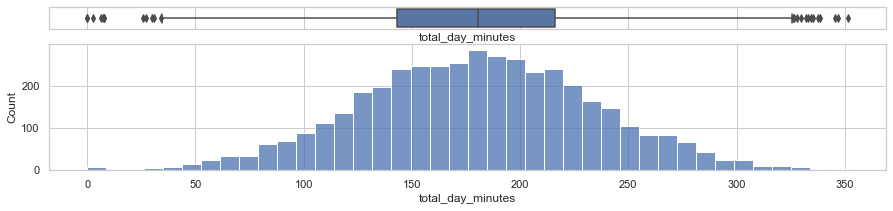

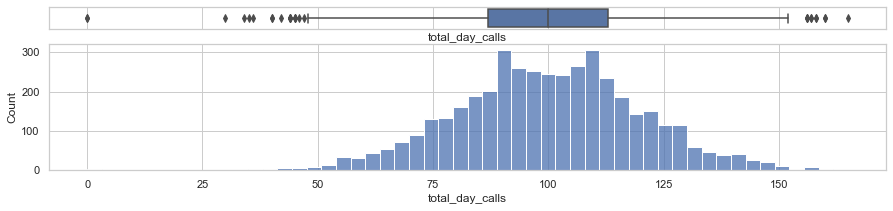

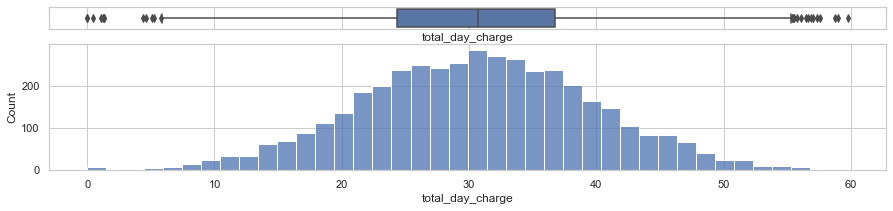

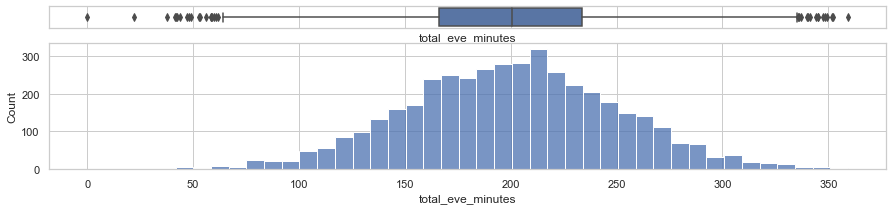

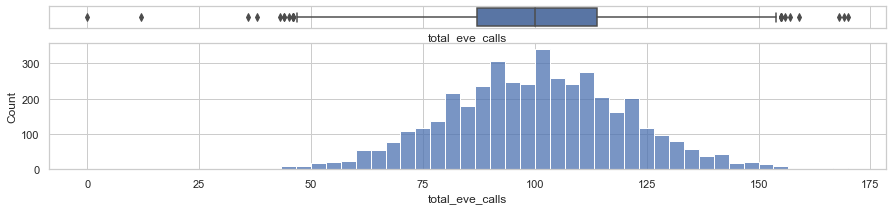

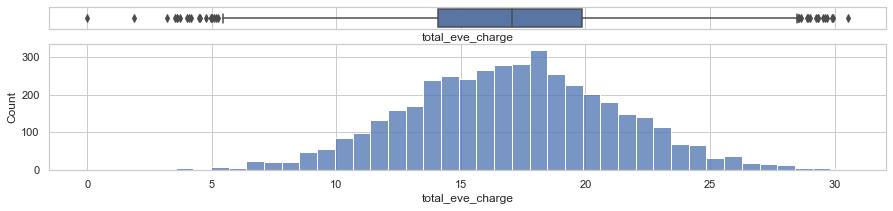

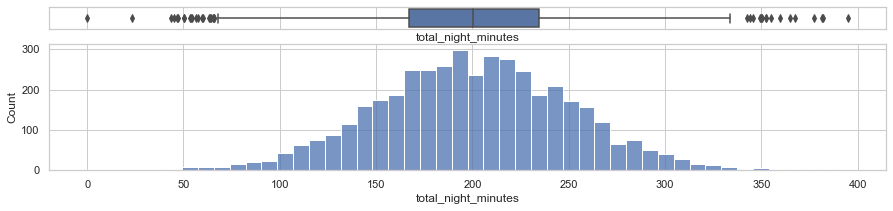

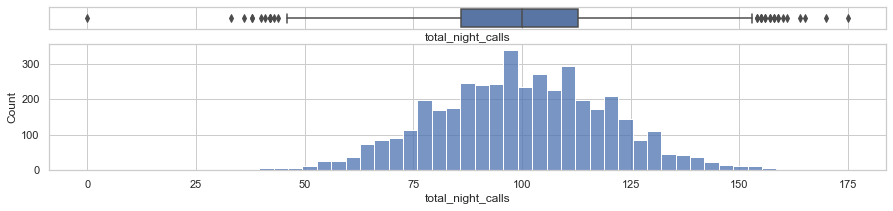

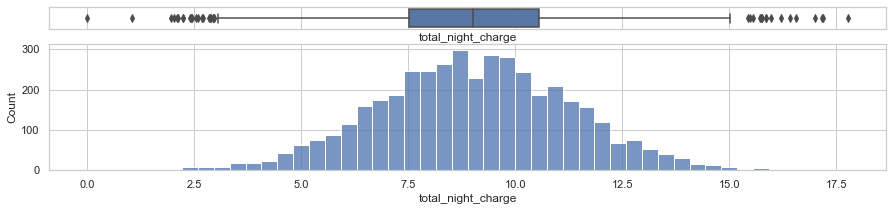

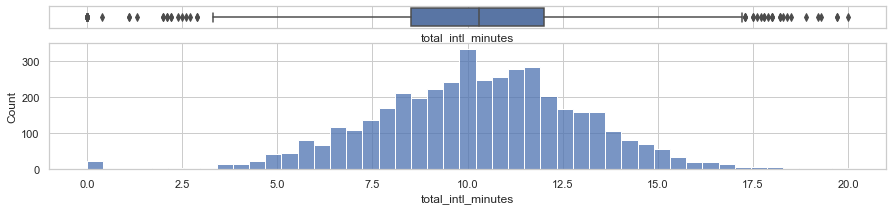

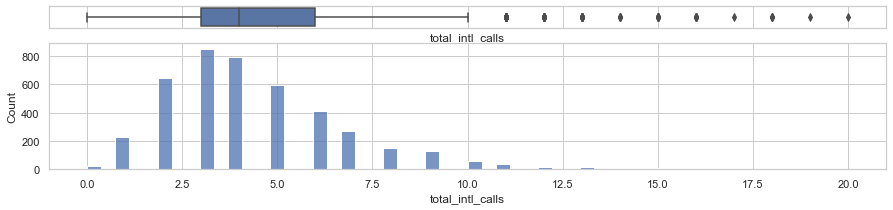

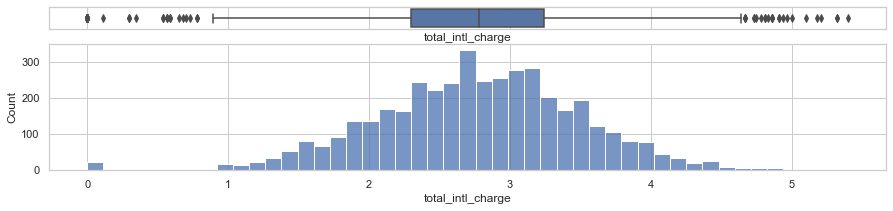

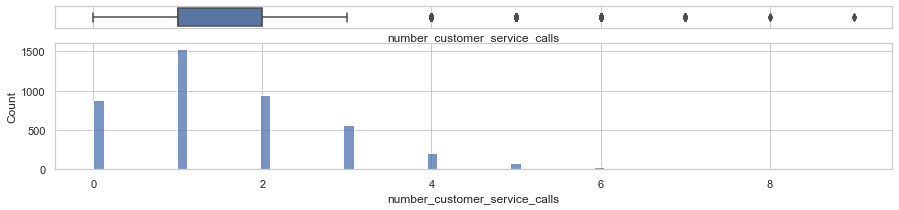

In [16]:
for feature in num_var:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.set_figheight(3)
    f.set_figwidth(15)
    sns.boxplot(data[feature], ax=ax_box)
    sns.histplot(data=data, x=feature, ax=ax_hist)
    plt.show()

- Number_customer_service_calls, total_internation_call and Number_voice_mail_messages are not a normal distribuation so we can covert into normal distribution in featuer engineering step.
- Other than the obove features all look like a normal distribuation.

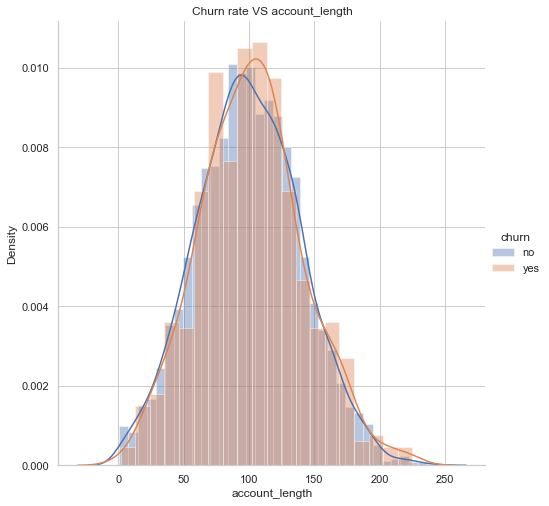

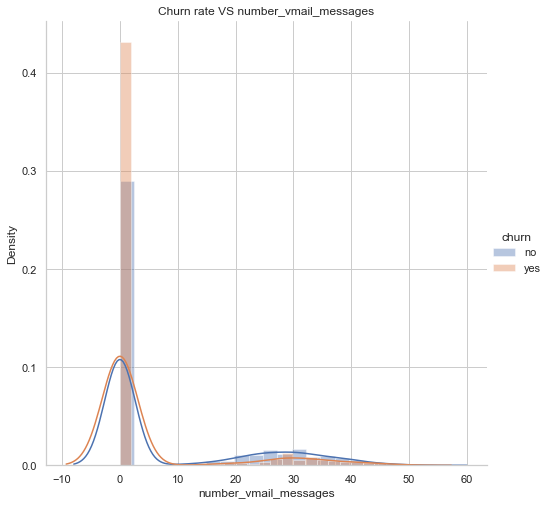

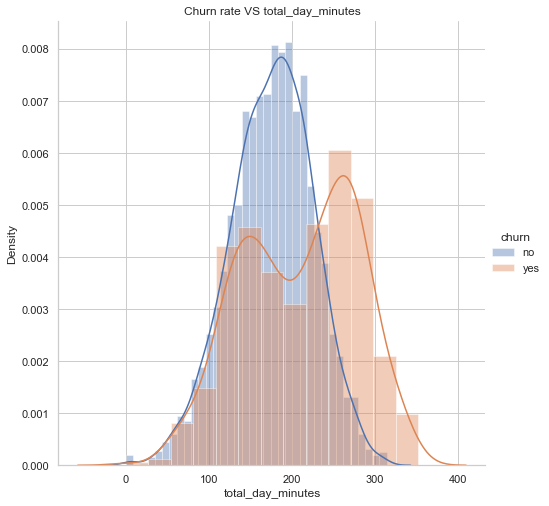

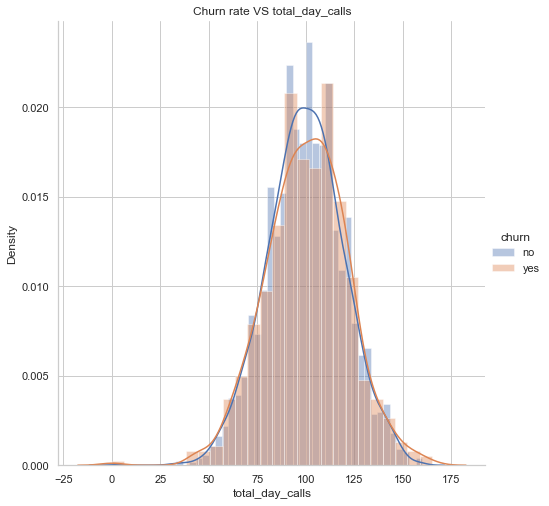

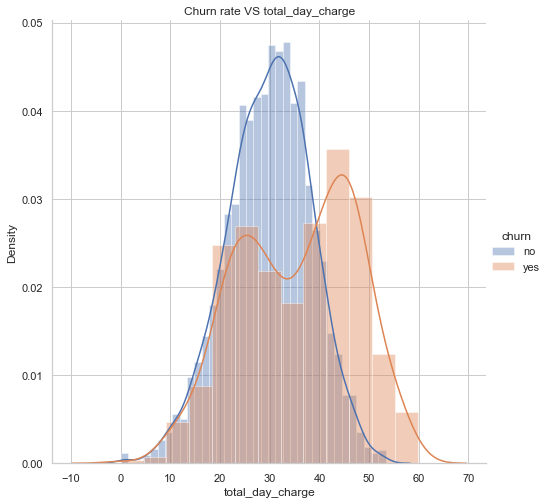

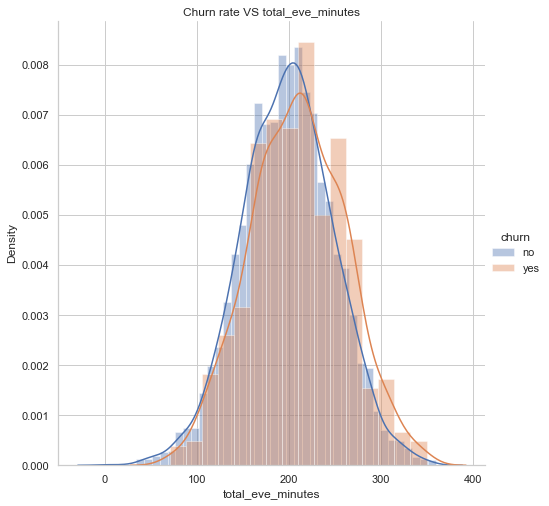

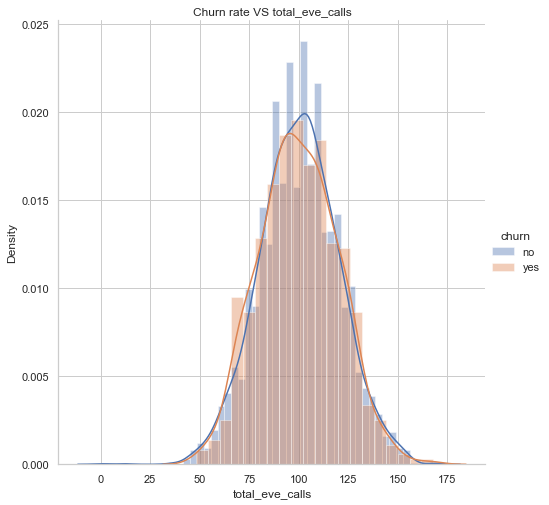

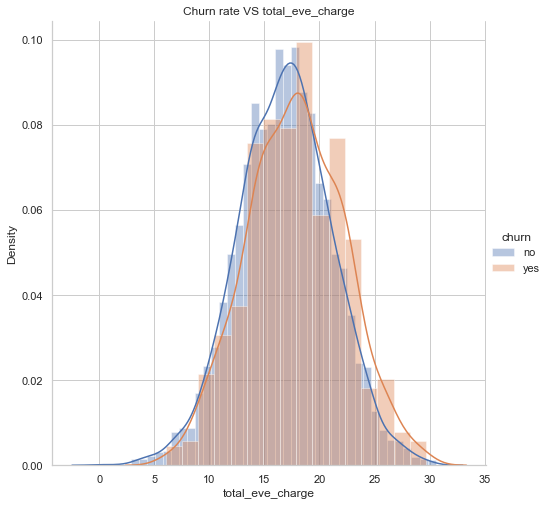

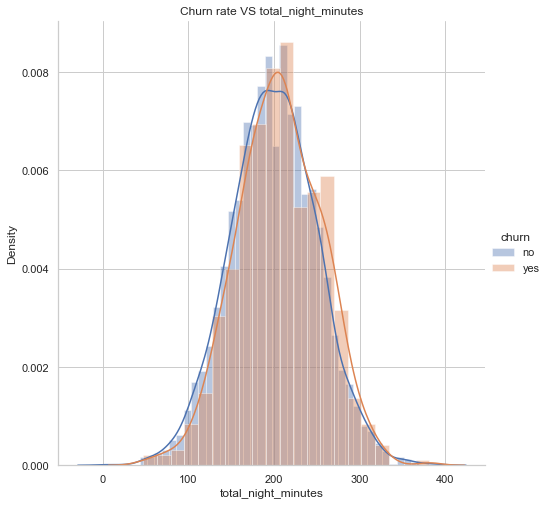

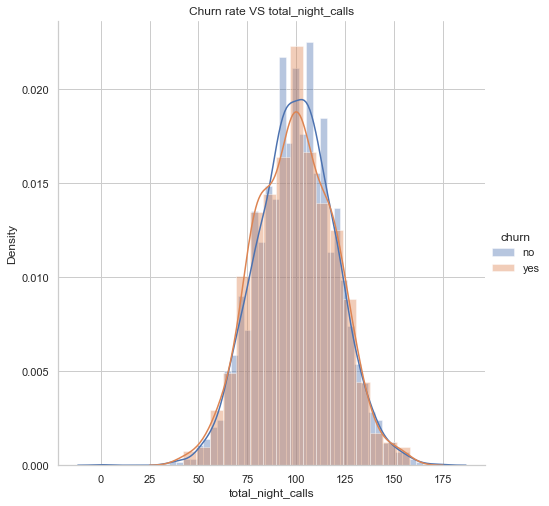

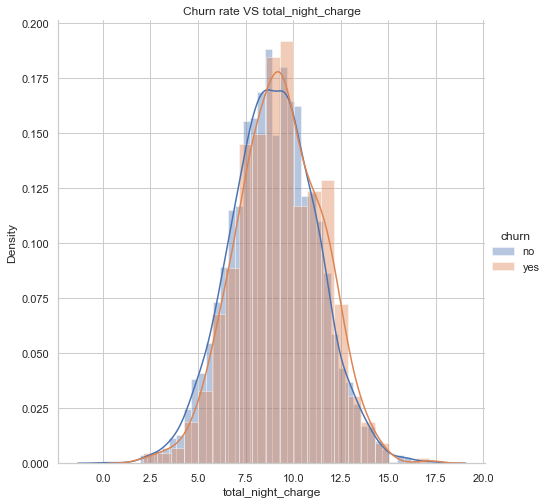

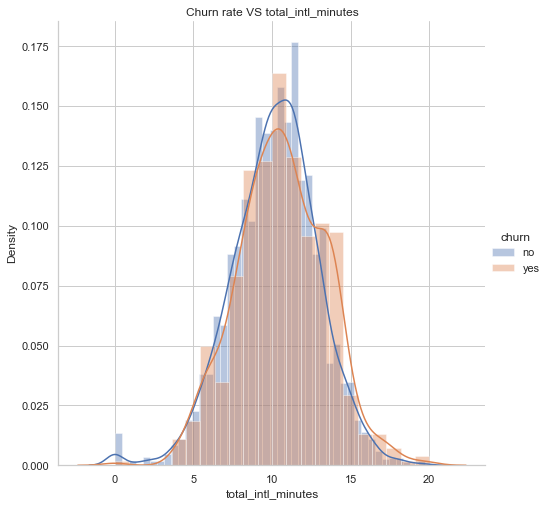

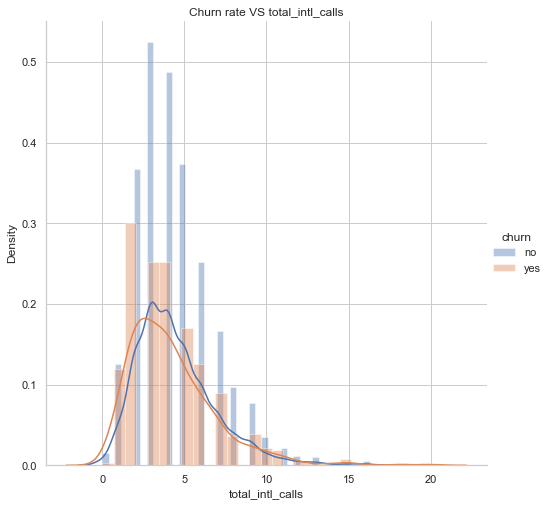

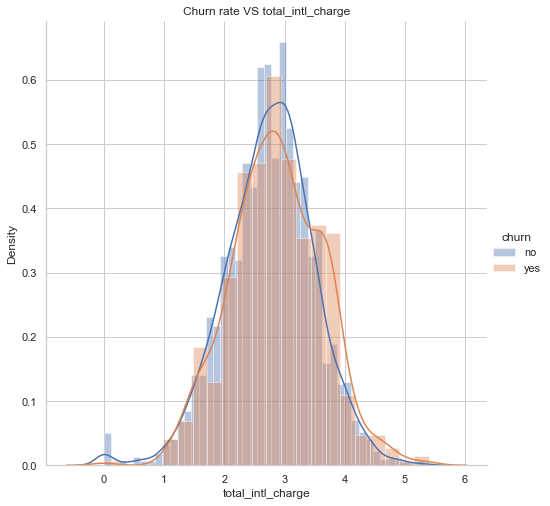

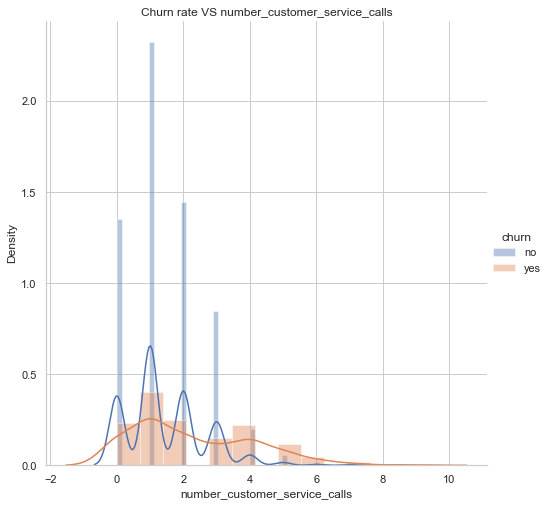

In [17]:
# BiVariate Analysis
# 1. Countinous Features
for feature in num_var:
    sns.FacetGrid(data, hue='churn',size=7).map(sns.distplot, feature).add_legend()
    plt.title(f'Churn rate VS {feature}')

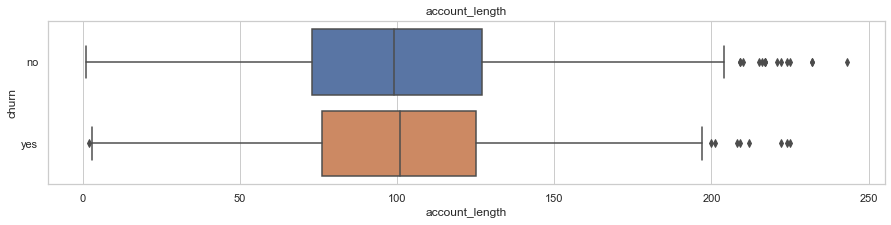

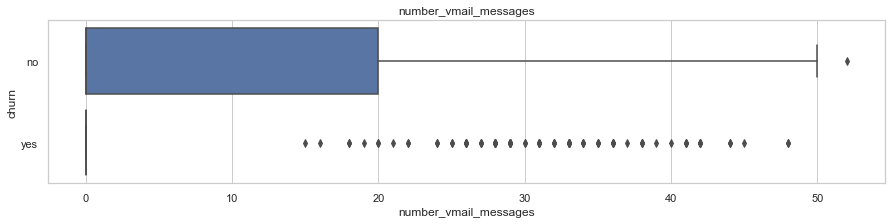

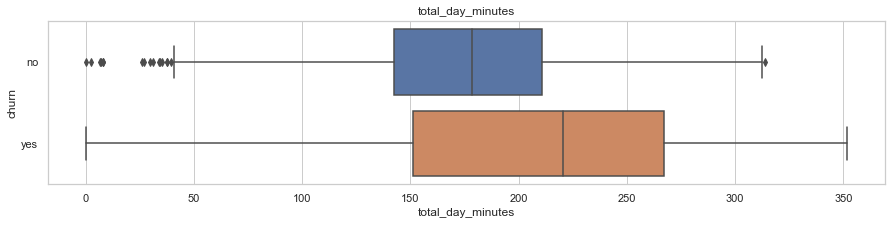

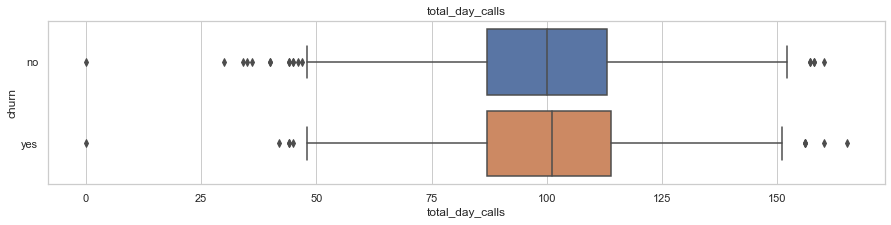

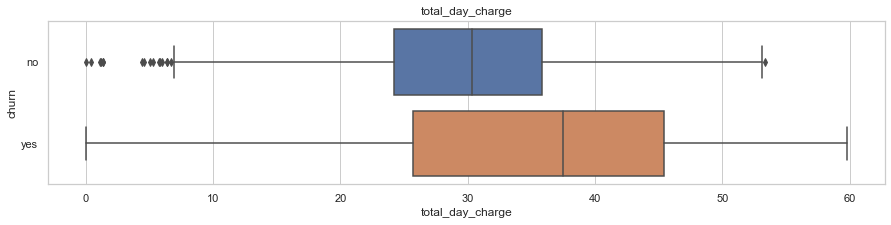

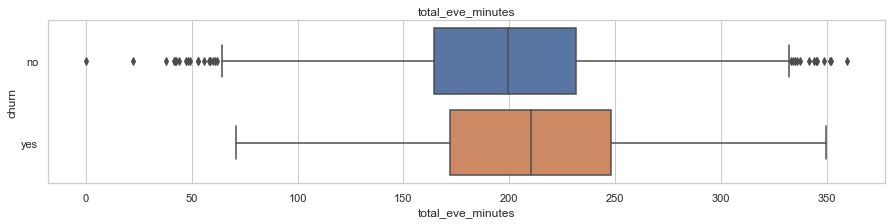

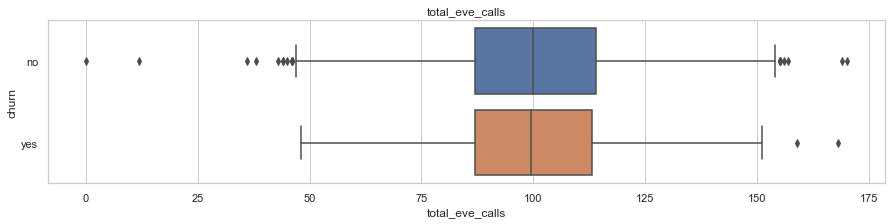

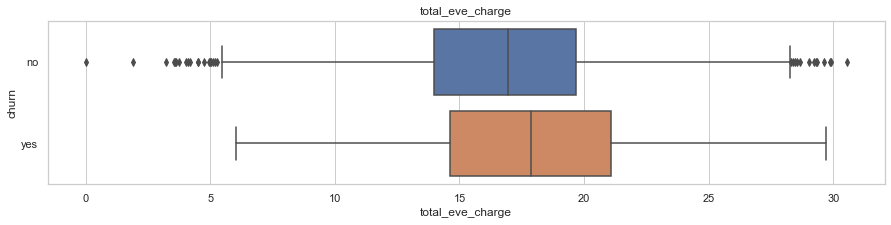

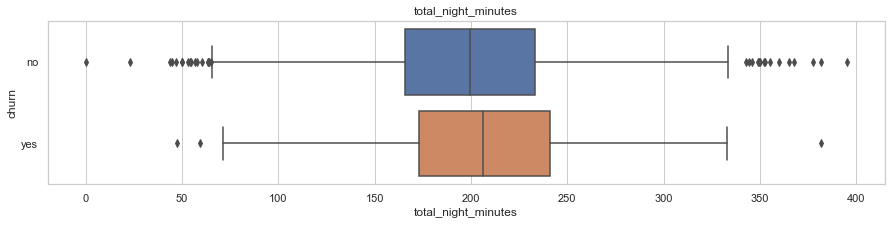

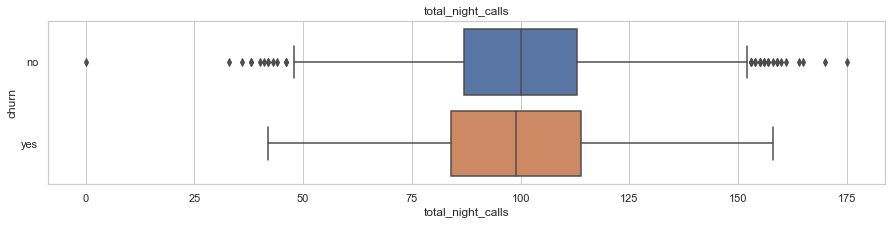

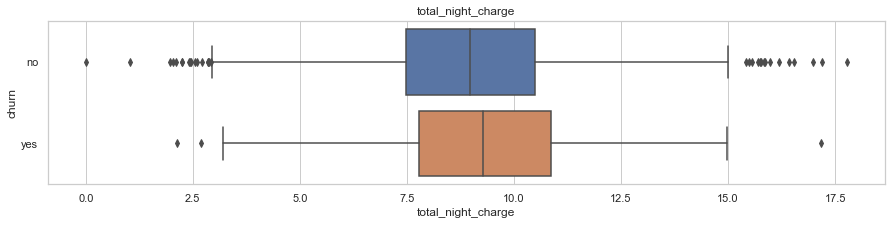

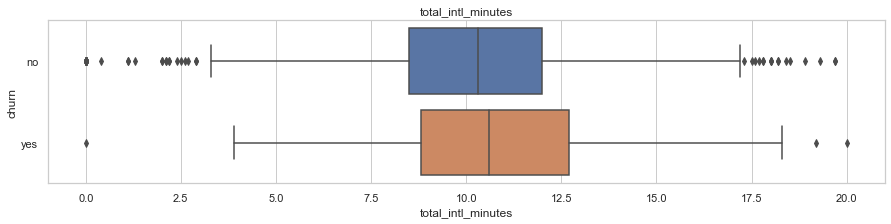

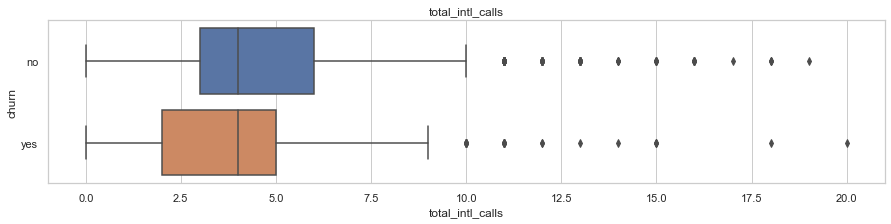

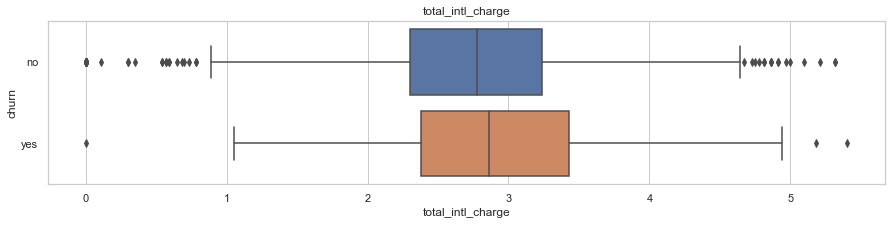

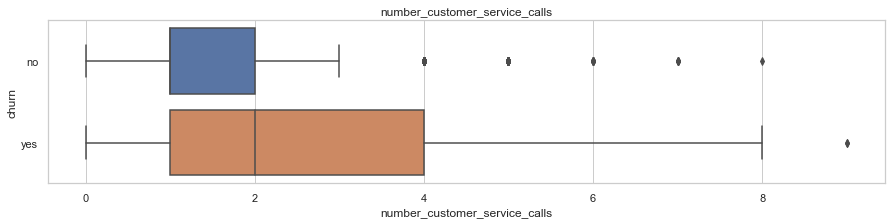

In [18]:
for feature in num_var:
    if feature != 'churn':
        plt.figure(figsize = (15,3))
        sns.boxplot(y ='churn', x = feature, data = data)
        plt.title(feature)
        plt.show()

In [19]:
# every features has a outliers so we need to remove the outliers.
# outlies contains the some usefull information.
# so we have to replace the outliers with some meaning full values. 
# so we should replace the outliers with meadin values

In [20]:
def IQR_OutlierDetector(data, onefeature, ConfParm = 1.5):
    col = onefeature
    datavalues = data[col]
    q1 = np.quantile(datavalues, 0.25)
    q3 = np.quantile(datavalues, 0.75)
    iqr = q3 - q1
    upper_bound = q3 + ConfParm * iqr
    lower_bound = q1 - ConfParm * iqr

    LowerOutlierData = [(idx, val) for idx, val in datavalues.items() if val < lower_bound]
    UpperOutlierData = [(idx, val) for idx, val in datavalues.items() if val > upper_bound]

    return LowerOutlierData, UpperOutlierData, [lower_bound, upper_bound]

In [21]:
def IQR_OutlierAnalysis(data, onefeature, LowerOutlierData, UpperOutlierData, ConfRange,target):
    datavalues = data[onefeature]
    print(f"Lower Outlier Data : {len(LowerOutlierData)}")
    print(LowerOutlierData)
    TargetLowerOutlierData = [data.loc[idx, target] for idx, val in LowerOutlierData]
    print(TargetLowerOutlierData)

    print(f"Upper Outlier Data : {len(UpperOutlierData)}")
    print(UpperOutlierData)
    TargetUpperOutlierData = [data.loc[idx, target] for idx, val in UpperOutlierData]
    print(TargetUpperOutlierData)

def IQR_OutlierVisualization(data, onefeature):
    datavalues = data[onefeature]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.set_figheight(3)
    f.set_figwidth(15)
    sns.boxplot(datavalues, ax=ax_box)
    sns.histplot(data=data, x=onefeature, ax=ax_hist)
    plt.show()

In [63]:
def IQR_ImputeNoise(data, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target):
    df = data[(data[onefeature] >= ConfRange[0]) & (data[onefeature] <= ConfRange[1])]
    TargetDict = { val : np.median(df[df[target] == val][onefeature])  for val in df[target].unique()}

    for idx,val in LowerOutlierData:
        data.loc[idx, onefeature] = TargetDict[data.loc[idx, target]]

    for idx,val in UpperOutlierData:
        data.loc[idx, onefeature] = TargetDict[data.loc[idx, target]]
    
    return data[onefeature], TargetDict

In [24]:
print(num_var)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [56]:
target = 'churn'
train = data.copy()

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 20
[(197, 215), (256, 209), (343, 224), (684, 243), (877, 217), (1193, 232), (1304, 225), (1472, 225), (1593, 224), (1828, 212), (1923, 210), (1939, 217), (2289, 209), (2725, 221), (2736, 209), (3679, 216), (3711, 222), (3719, 232), (3932, 217), (4079, 222)]
['no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


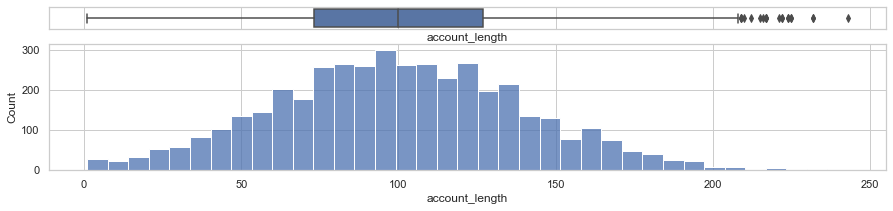

{'no': 99.0, 'yes': 101.0}


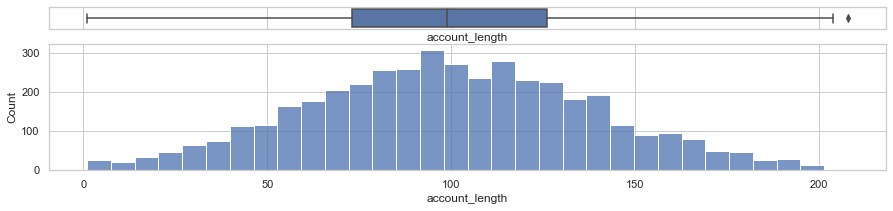

In [64]:
onefeature = "account_length"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)

train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 86
[(32, 41), (52, 41), (58, 46), (96, 42), (122, 43), (207, 41), (229, 48), (290, 41), (350, 45), (454, 41), (495, 46), (508, 43), (589, 42), (660, 45), (681, 41), (731, 43), (845, 42), (864, 42), (911, 42), (1167, 42), (1169, 43), (1220, 47), (1230, 44), (1241, 41), (1256, 44), (1346, 49), (1351, 44), (1456, 43), (1483, 42), (1514, 47), (1529, 42), (1544, 42), (1558, 43), (1615, 45), (1638, 42), (1947, 42), (2011, 45), (2091, 45), (2126, 41), (2135, 42), (2181, 43), (2213, 46), (2278, 44), (2303, 50), (2343, 44), (2407, 41), (2443, 50), (2565, 42), (2674, 47), (2683, 44), (2691, 43), (2693, 41), (2755, 44), (2784, 43), (2790, 42), (2838, 43), (2850, 41), (2913, 46), (2978, 45), (2979, 49), (2996, 46), (3022, 49), (3092, 41), (3132, 41), (3160, 42), (3235, 45), (3247, 42), (3264, 42), (3305, 43), (3330, 41), (3334, 41), (3414, 41), (3443, 47), (3614, 41), (3620, 46), (3675, 45), (3763, 46), (3816, 45), (3828, 48), (3895, 43), (3928, 45

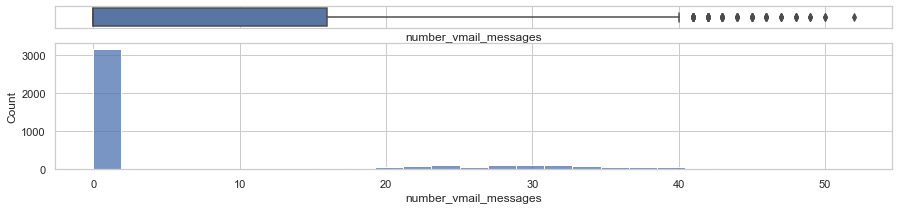

In [65]:
onefeature = "number_vmail_messages"
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(data, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(data , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, 'churn')
IQR_OutlierVisualization(data, onefeature)

In [66]:
data[onefeature].value_counts()[:10]

0     3139
31      69
28      58
29      57
24      57
33      55
27      54
26      53
32      47
30      47
Name: number_vmail_messages, dtype: int64

Lower Outlier Data : 5
[(1222, 8), (1680, 4), (2048, 8), (2852, 6), (3214, 6)]
['no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 3
[(2303, 50), (2443, 50), (4005, 52)]
['no', 'no', 'no']


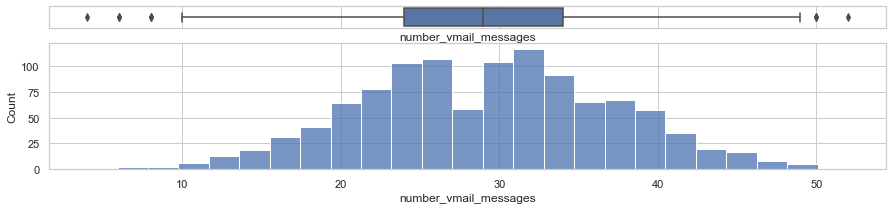

{'no': 29.0, 'yes': 31.0}


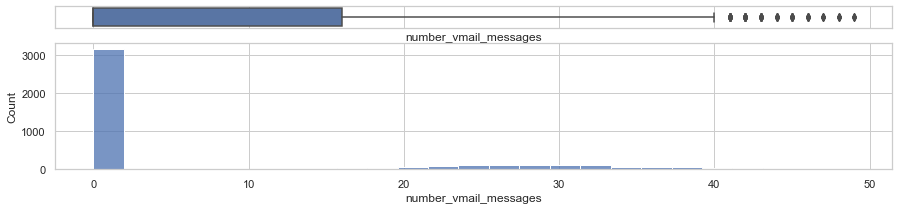

In [67]:
onefeature = "number_vmail_messages"
DataNoise = data[data[onefeature] != 0]
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)

train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 12
[(570, 30.9), (618, 34.0), (900, 25.9), (1138, 0.0), (1183, 0.0), (1683, 7.9), (1805, 27.0), (2318, 2.6), (2332, 7.8), (2691, 29.9), (4157, 6.6), (4234, 7.2)]
['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 13
[(12, 332.9), (129, 337.4), (162, 326.5), (500, 335.5), (817, 334.3), (827, 346.8), (1415, 329.8), (1717, 328.1), (2051, 326.3), (2202, 345.3), (2921, 338.4), (3381, 351.5), (3494, 332.1)]
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


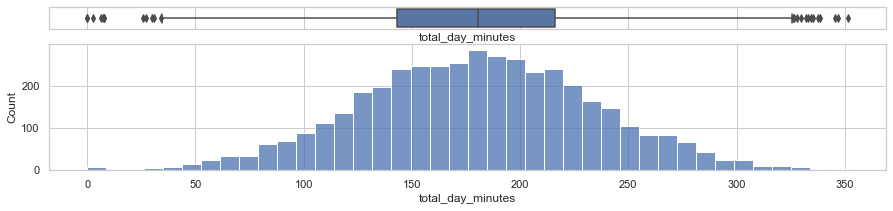

In [69]:
onefeature = "total_day_minutes"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

{'no': 178.4, 'yes': 217.05}


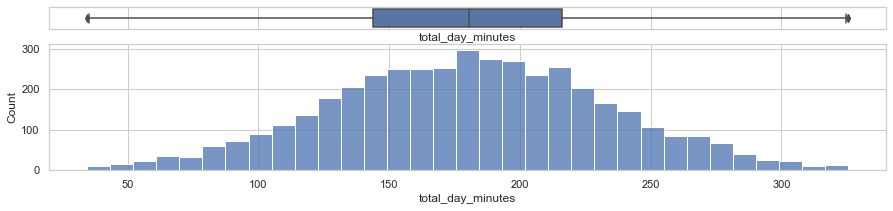

In [70]:
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 18
[(119, 47), (575, 36), (617, 40), (960, 30), (1119, 42), (1138, 0), (1139, 45), (1183, 0), (1205, 45), (1686, 35), (2119, 45), (2441, 44), (2442, 44), (2509, 44), (2702, 40), (3434, 34), (3763, 44), (3780, 46)]
['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 10
[(262, 158), (887, 158), (942, 165), (1235, 160), (1578, 156), (2034, 157), (3579, 156), (3639, 156), (3649, 157), (3871, 160)]
['no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']


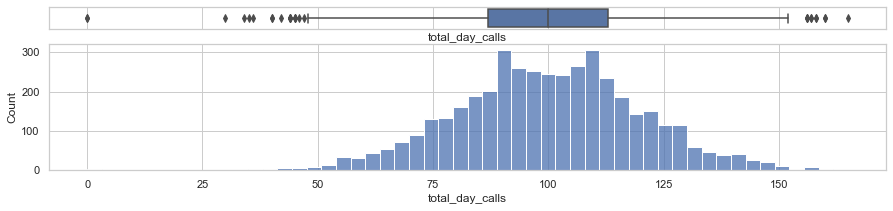

In [71]:
onefeature = "total_day_calls"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

{'no': 100.0, 'yes': 101.0}


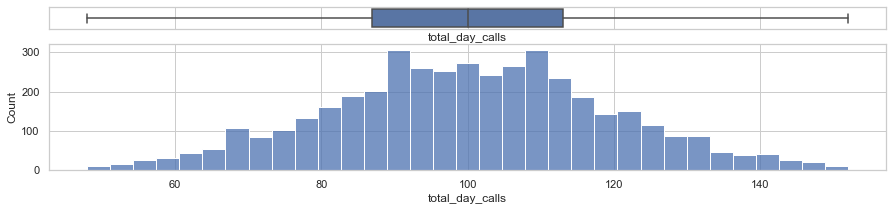

In [72]:
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 12
[(570, 5.25), (618, 5.78), (900, 4.4), (1138, 0.0), (1183, 0.0), (1683, 1.34), (1805, 4.59), (2318, 0.44), (2332, 1.33), (2691, 5.08), (4157, 1.12), (4234, 1.22)]
['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 14
[(12, 56.59), (129, 57.36), (162, 55.51), (500, 57.04), (817, 56.83), (827, 58.96), (1415, 56.07), (1717, 55.78), (2051, 55.47), (2202, 58.7), (2921, 57.53), (3381, 59.76), (3494, 56.46), (3791, 55.34)]
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


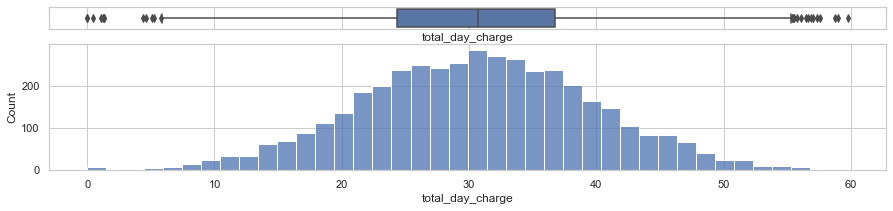

In [73]:
onefeature = "total_day_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

{'no': 30.33, 'yes': 36.87}


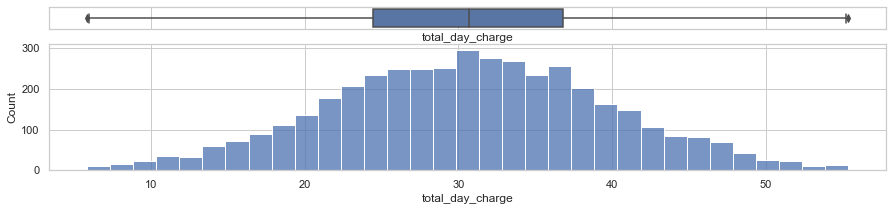

In [74]:
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 19
[(2, 61.9), (442, 42.2), (486, 58.9), (688, 43.9), (712, 52.9), (744, 42.5), (748, 60.8), (885, 58.6), (997, 56.0), (1036, 48.1), (1129, 60.0), (1661, 49.2), (2482, 0.0), (2859, 22.3), (3213, 58.3), (3377, 37.8), (3384, 41.7), (3707, 47.3), (3717, 53.2)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 15
[(4, 348.5), (6, 351.6), (439, 337.1), (479, 347.3), (1075, 336.0), (1838, 339.9), (1986, 335.7), (2602, 341.3), (3345, 344.0), (3524, 349.4), (3854, 344.9), (3873, 352.1), (3924, 345.1), (4157, 359.3), (4244, 340.3)]
['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes']


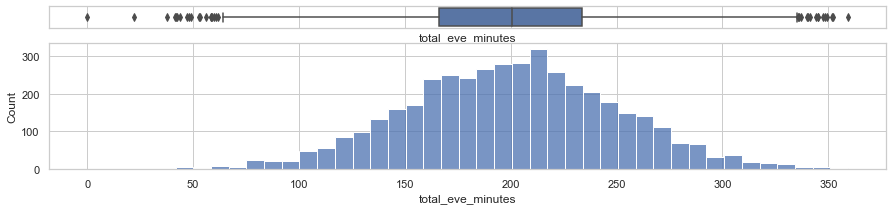

{'no': 199.4, 'yes': 209.9}


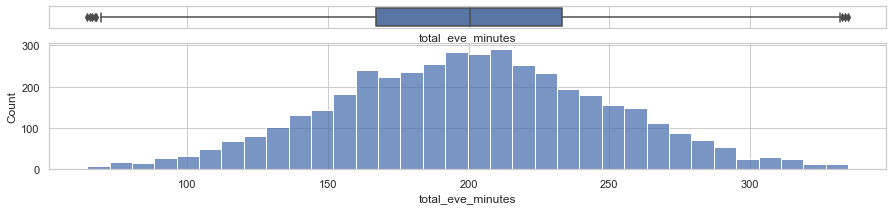

In [76]:
onefeature = "total_eve_minutes" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 13
[(127, 46), (803, 12), (1066, 45), (1361, 36), (1455, 46), (1567, 44), (2200, 46), (2418, 43), (2482, 0), (2837, 46), (2982, 46), (4028, 38), (4217, 44)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 11
[(249, 168), (856, 157), (896, 155), (1437, 156), (1893, 155), (2645, 155), (2677, 159), (2728, 170), (3332, 169), (3801, 155), (3880, 155)]
['yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']


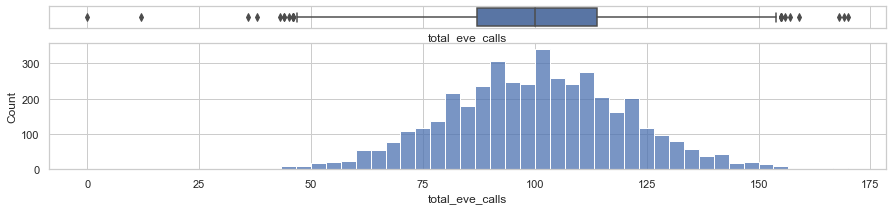

{'no': 100.5, 'yes': 99.0}


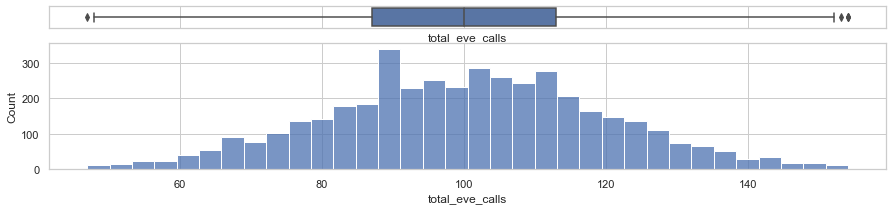

In [77]:
onefeature = "total_eve_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 19
[(2, 5.26), (442, 3.59), (486, 5.01), (688, 3.73), (712, 4.5), (744, 3.61), (748, 5.17), (885, 4.98), (997, 4.76), (1036, 4.09), (1129, 5.1), (1661, 4.18), (2482, 0.0), (2859, 1.9), (3213, 4.96), (3377, 3.21), (3384, 3.54), (3707, 4.02), (3717, 4.52)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 15
[(4, 29.62), (6, 29.89), (439, 28.65), (479, 29.52), (1075, 28.56), (1838, 28.89), (1986, 28.53), (2602, 29.01), (3345, 29.24), (3524, 29.7), (3854, 29.32), (3873, 29.93), (3924, 29.33), (4157, 30.54), (4244, 28.93)]
['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes']


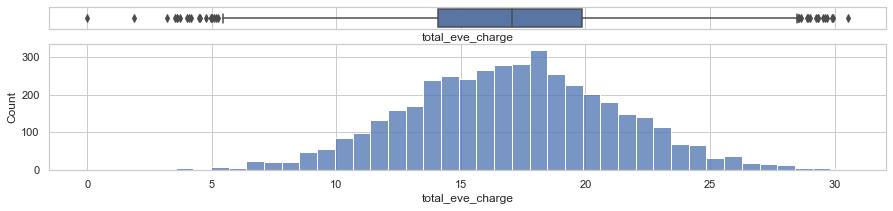

{'no': 16.95, 'yes': 17.84}


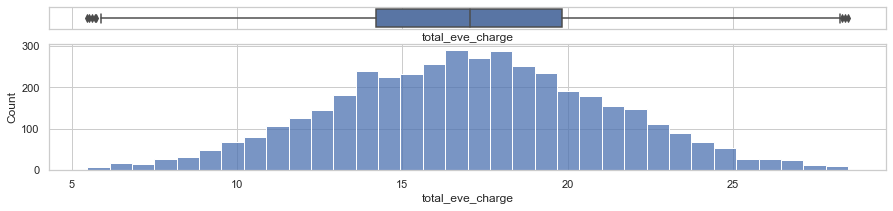

In [78]:
onefeature = "total_eve_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 21
[(97, 57.5), (699, 65.8), (739, 45.0), (832, 63.3), (838, 54.5), (897, 50.1), (934, 43.7), (1060, 23.2), (1110, 63.6), (1276, 65.7), (1997, 56.6), (2025, 54.0), (2086, 64.2), (2334, 50.1), (2557, 53.3), (2756, 47.4), (3219, 46.7), (3572, 65.2), (3713, 59.5), (4001, 0.0), (4106, 60.3)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 16
[(369, 349.2), (723, 345.8), (767, 342.8), (1007, 349.7), (1041, 352.5), (1114, 381.9), (1222, 377.5), (1973, 367.7), (2214, 344.3), (2257, 395.0), (2333, 350.2), (2590, 352.2), (2631, 364.9), (2865, 381.6), (3296, 359.9), (4015, 355.1)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no']


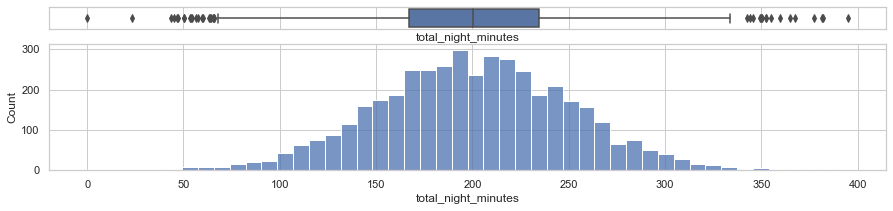

{'no': 199.4, 'yes': 206.3}


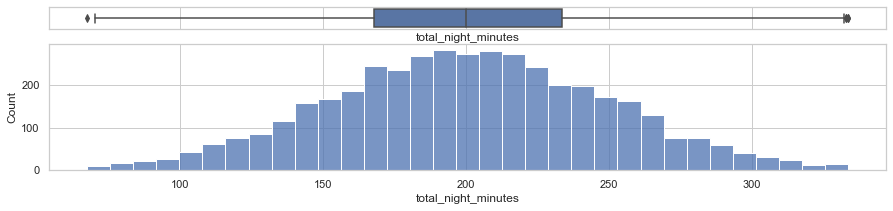

In [79]:
onefeature = "total_night_minutes" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 13
[(271, 42), (279, 44), (328, 42), (2253, 33), (2458, 38), (2529, 36), (2989, 40), (3457, 42), (3462, 41), (3559, 38), (3716, 42), (3859, 43), (4001, 0)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 20
[(409, 175), (485, 154), (753, 158), (930, 155), (1005, 157), (1094, 157), (2313, 155), (2318, 156), (2689, 156), (2721, 164), (3018, 161), (3185, 159), (3213, 160), (3292, 170), (3316, 158), (3449, 154), (3520, 159), (3680, 155), (3820, 165), (3877, 155)]
['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


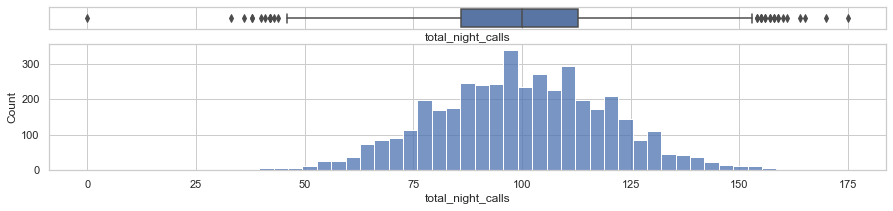

{'no': 100.0, 'yes': 99.0}


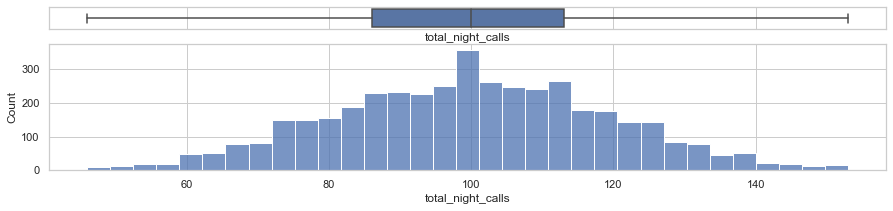

In [80]:
onefeature = "total_night_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 21
[(97, 2.59), (699, 2.96), (739, 2.03), (832, 2.85), (838, 2.45), (897, 2.25), (934, 1.97), (1060, 1.04), (1110, 2.86), (1276, 2.96), (1997, 2.55), (2025, 2.43), (2086, 2.89), (2334, 2.25), (2557, 2.4), (2756, 2.13), (3219, 2.1), (3572, 2.93), (3713, 2.68), (4001, 0.0), (4106, 2.71)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 16
[(369, 15.71), (723, 15.56), (767, 15.43), (1007, 15.74), (1041, 15.86), (1114, 17.19), (1222, 16.99), (1973, 16.55), (2214, 15.49), (2257, 17.77), (2333, 15.76), (2590, 15.85), (2631, 16.42), (2865, 17.17), (3296, 16.2), (4015, 15.98)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no']


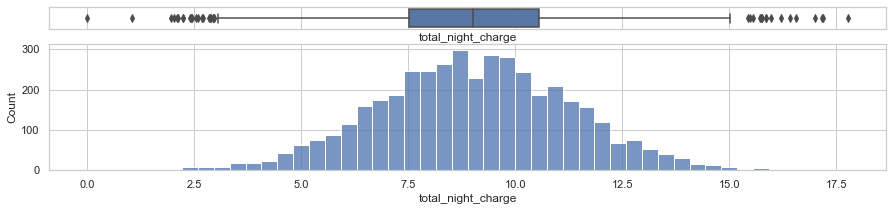

{'no': 8.97, 'yes': 9.28}


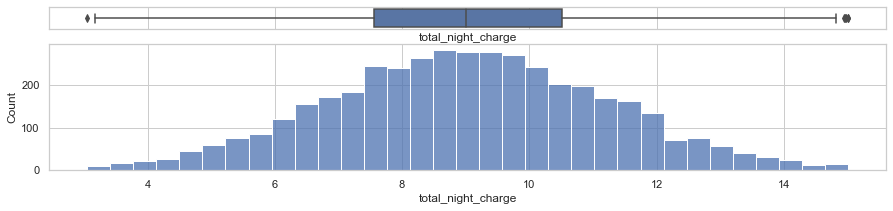

In [81]:
onefeature = "total_night_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 38
[(146, 0.0), (185, 2.7), (285, 0.0), (405, 0.0), (593, 0.0), (636, 1.3), (735, 0.0), (863, 0.0), (903, 0.0), (920, 2.2), (1186, 0.0), (1317, 0.0), (1666, 2.0), (1854, 2.9), (1920, 2.6), (1993, 0.0), (2007, 0.0), (2136, 0.0), (2263, 1.1), (2316, 0.0), (2461, 0.0), (2470, 0.0), (2483, 2.1), (2555, 2.9), (2679, 2.1), (2725, 2.4), (2743, 2.5), (2780, 0.0), (2792, 0.0), (2886, 0.0), (3090, 0.0), (3288, 0.4), (3476, 2.2), (3703, 0.0), (3768, 0.0), (4192, 0.0), (4204, 1.1), (4209, 2.0)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 24
[(96, 20.0), (261, 18.9), (304, 18.0), (414, 17.5), (443, 18.2), (1057, 18.0), (1203, 17.9), (1323, 17.3), (1392, 17.3), (1530, 18.4), (1895, 17.6), (1904, 17.3), (2015, 18.2), (2154, 18.0), (2384, 18.3), (2607, 17.5), (2807, 17.8), (330

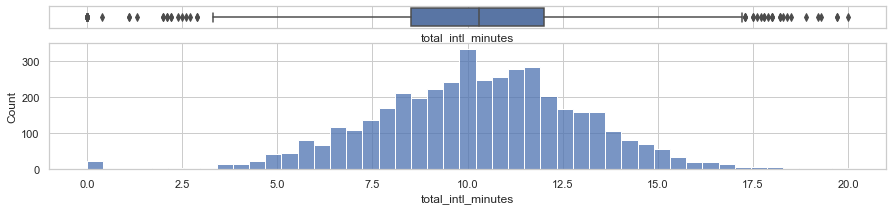

{'no': 10.3, 'yes': 10.5}


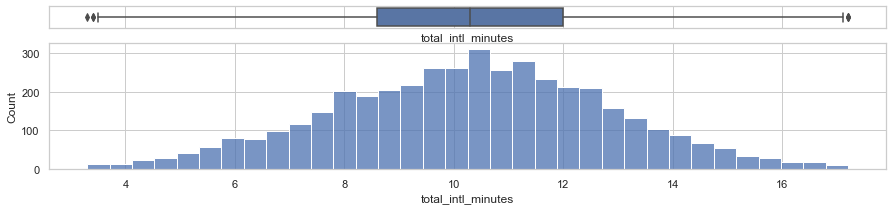

In [82]:
onefeature = "total_intl_minutes" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 100
[(18, 19), (32, 15), (126, 11), (149, 12), (152, 13), (176, 11), (179, 12), (205, 11), (225, 13), (274, 12), (289, 11), (312, 18), (347, 11), (393, 12), (400, 13), (416, 12), (426, 12), (487, 11), (527, 15), (533, 13), (560, 15), (581, 11), (630, 14), (701, 13), (705, 11), (724, 13), (739, 12), (770, 14), (800, 15), (824, 18), (857, 12), (914, 13), (1120, 11), (1127, 12), (1148, 14), (1178, 15), (1202, 12), (1320, 16), (1334, 11), (1398, 11), (1514, 11), (1545, 11), (1596, 15), (1661, 11), (1696, 14), (1710, 11), (1834, 11), (1932, 13), (2175, 11), (2186, 11), (2222, 16), (2292, 13), (2309, 11), (2348, 13), (2394, 11), (2402, 15), (2440, 11), (2481, 12), (2496, 13), (2503, 18), (2558, 12), (2599, 12), (2621, 11), (2633, 13), (2652, 11), (2717, 13), (2739, 14), (2793, 20), (2810, 17), (2898, 12), (2975, 13), (2994, 16), (3032, 11), (3068, 16), (3091, 16), (3147, 11), (3214, 11), (3235, 12), (3246, 15), (3247, 16), (3362, 12), (3379, 

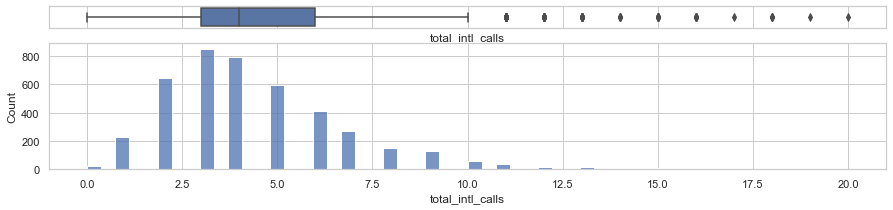

{'no': 4.0, 'yes': 4.0}


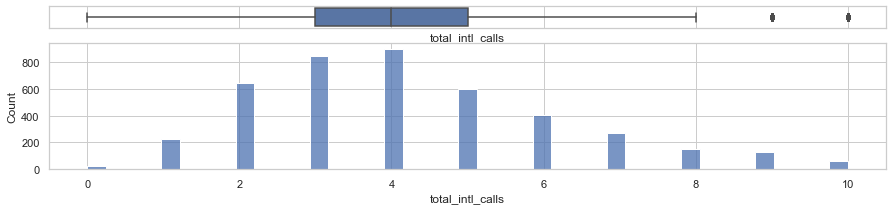

In [83]:
onefeature = "total_intl_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 38
[(146, 0.0), (185, 0.73), (285, 0.0), (405, 0.0), (593, 0.0), (636, 0.35), (735, 0.0), (863, 0.0), (903, 0.0), (920, 0.59), (1186, 0.0), (1317, 0.0), (1666, 0.54), (1854, 0.78), (1920, 0.7), (1993, 0.0), (2007, 0.0), (2136, 0.0), (2263, 0.3), (2316, 0.0), (2461, 0.0), (2470, 0.0), (2483, 0.57), (2555, 0.78), (2679, 0.57), (2725, 0.65), (2743, 0.68), (2780, 0.0), (2792, 0.0), (2886, 0.0), (3090, 0.0), (3288, 0.11), (3476, 0.59), (3703, 0.0), (3768, 0.0), (4192, 0.0), (4204, 0.3), (4209, 0.54)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 24
[(96, 5.4), (261, 5.1), (304, 4.86), (414, 4.73), (443, 4.91), (1057, 4.86), (1203, 4.83), (1323, 4.67), (1392, 4.67), (1530, 4.97), (1895, 4.75), (1904, 4.67), (2015, 4.91), (2154, 4.86), (2384, 4.94), (2607, 4.73), (2807, 

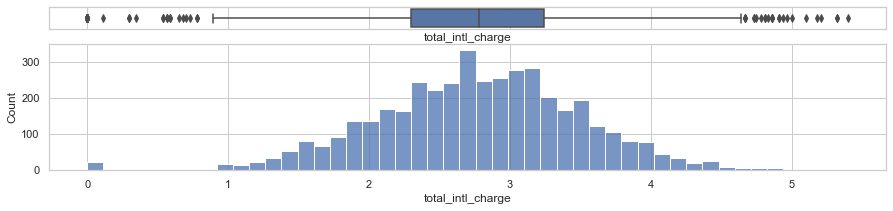

{'no': 2.78, 'yes': 2.84}


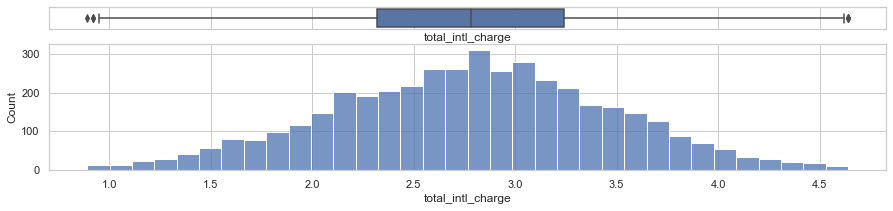

In [84]:
onefeature = "total_intl_charge" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 1.5)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)
DataNoise[onefeature], TargetDict = IQR_ImputeNoise(DataNoise, onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
print(TargetDict)
train.loc[DataNoise.index, onefeature] = DataNoise[onefeature]
IQR_OutlierVisualization(train, onefeature)

Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 45
[(277, 7), (433, 7), (449, 9), (577, 6), (602, 6), (650, 6), (754, 7), (759, 6), (816, 6), (1072, 6), (1192, 6), (1268, 8), (1380, 6), (1427, 7), (1544, 7), (1575, 7), (1619, 8), (1625, 6), (1889, 6), (1979, 6), (2023, 9), (2030, 6), (2064, 6), (2357, 6), (2500, 7), (2506, 6), (2523, 7), (2559, 6), (2608, 6), (2636, 7), (2704, 6), (3030, 6), (3038, 6), (3254, 6), (3462, 7), (3648, 7), (3656, 7), (3734, 7), (3847, 6), (3931, 6), (3970, 6), (3986, 6), (4061, 6), (4072, 6), (4180, 6)]
['yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes']


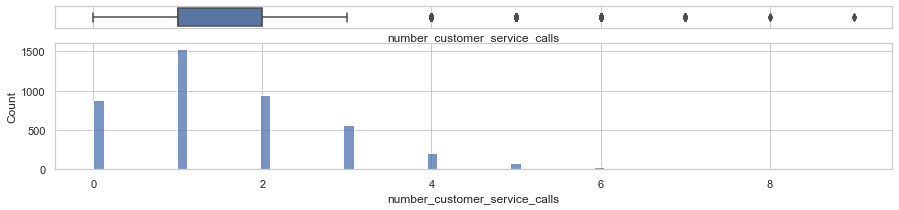

In [86]:
onefeature = "number_customer_service_calls" 
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, onefeature, ConfParm = 3)
IQR_OutlierAnalysis(DataNoise , onefeature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, onefeature)

In [88]:
data[onefeature].value_counts()

1    1524
2     947
0     886
3     558
4     209
5      81
6      28
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64

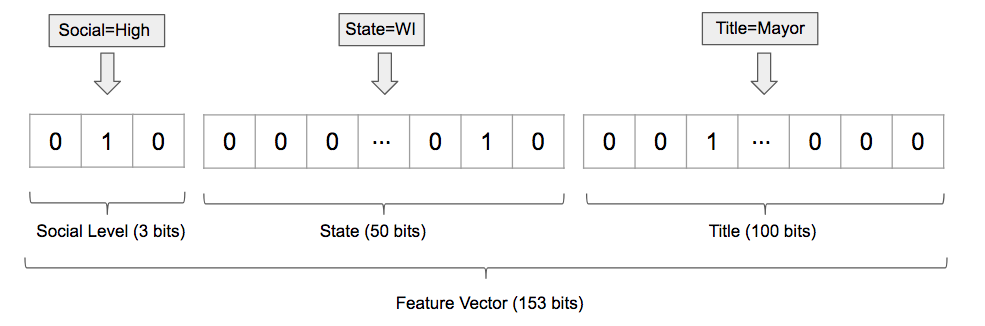

In [101]:
display(Image(filename='Hashing Encoding 1.png'))

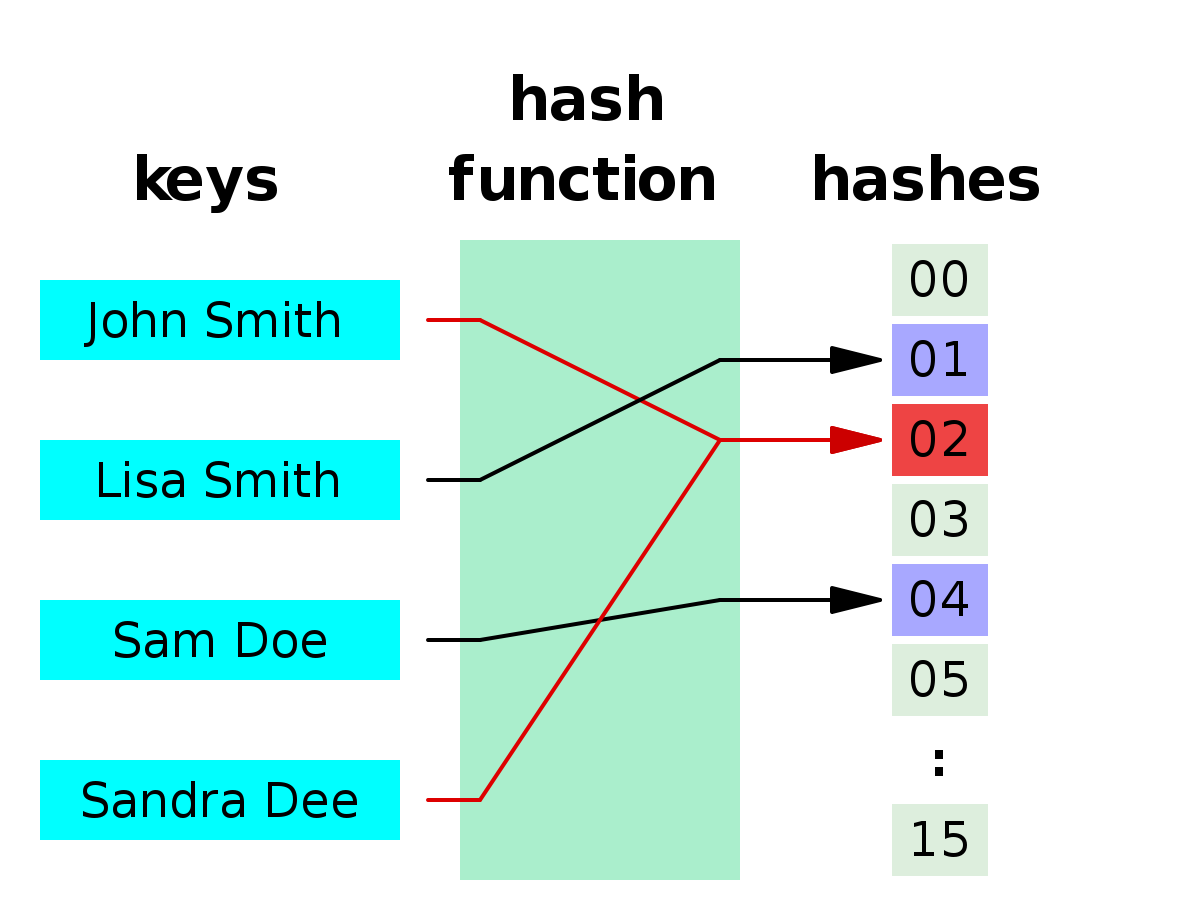

In [100]:
display(Image(filename='Hashing Encoding.png'))

In [89]:
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(train)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1,no
1,0,1,0,0,0,0,0,0,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0,no
2,0,0,0,0,1,0,0,0,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,199.4,88.0,16.95,196.9,89.0,8.86,6.6,7.0,1.78,2,no
3,0,0,0,0,1,0,0,0,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3,no
4,0,0,0,0,1,0,0,0,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,199.4,108.0,16.95,212.6,118.0,9.57,7.5,7.0,2.03,3,no


In [90]:
# replace no to 0 and yes to 1
train.international_plan.replace(['no','yes'],[0,1],inplace = True)
train.voice_mail_plan.replace(['no','yes'],[0,1],inplace=True)
train.churn.replace(['no','yes'],[0,1],inplace = True)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107.0,area_code_415,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1,0
1,0,1,0,0,0,0,0,0,137.0,area_code_415,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0,0
2,0,0,0,0,1,0,0,0,84.0,area_code_408,1,0,0.0,299.4,71.0,50.90,199.4,88.0,16.95,196.9,89.0,8.86,6.6,7.0,1.78,2,0
3,0,0,0,0,1,0,0,0,75.0,area_code_415,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3,0
4,0,0,0,0,1,0,0,0,121.0,area_code_510,0,1,24.0,218.2,88.0,37.09,199.4,108.0,16.95,212.6,118.0,9.57,7.5,7.0,2.03,3,0


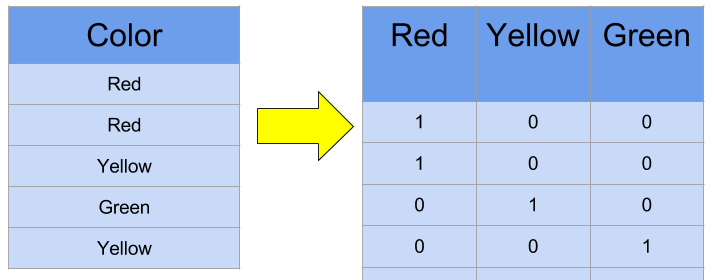

In [102]:
display(Image(filename='One Hot Encoding.png'))

In [91]:
# converting the area_code to numerical variable using one-hot encoder
onehot_area = OneHotEncoder()
onehot_area.fit(train[['area_code']])

encoded_values = onehot_area.transform(train[['area_code']])
train[onehot_area.categories_[0]] = encoded_values.toarray()
train = train.drop('area_code', axis=1)

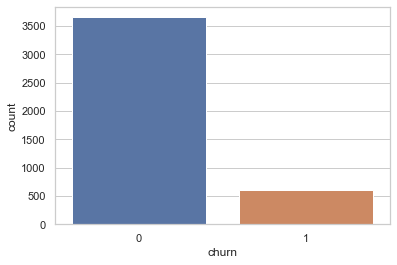

In [92]:
# Handling the Imbalanced dataset
# showing the imbalanced class
sns.countplot(x = 'churn', data = train)
plt.show()

0 represent the no churn and 1 represent the churn so there are huge difference in the class. so we need to balanced the dataset. We have to use upsampling for handling the dataset

In [93]:
x = train.drop('churn',axis=1).values
y = train.churn.values
# spliting the data into test and train
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

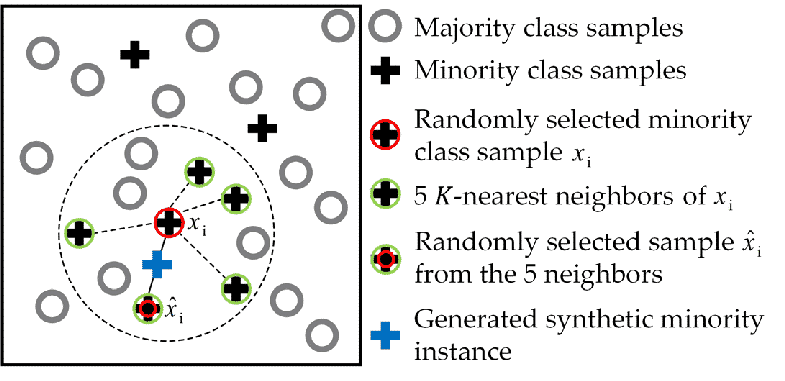

In [104]:
display(Image(filename='SMOTE.png'))

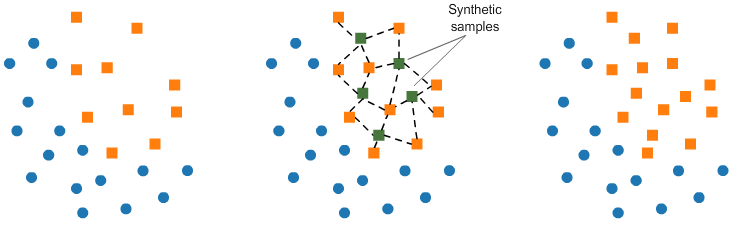

In [105]:
display(Image(filename='SMOTE 1.png'))

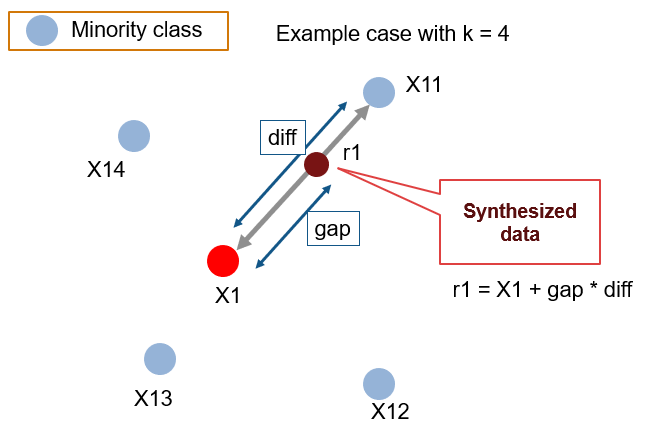

In [106]:
display(Image(filename='SMOTE 2.png'))

In [94]:
# after apply the upsampling technique the number of samples of both classes are same
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


In [95]:
# creating the object of minmax scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

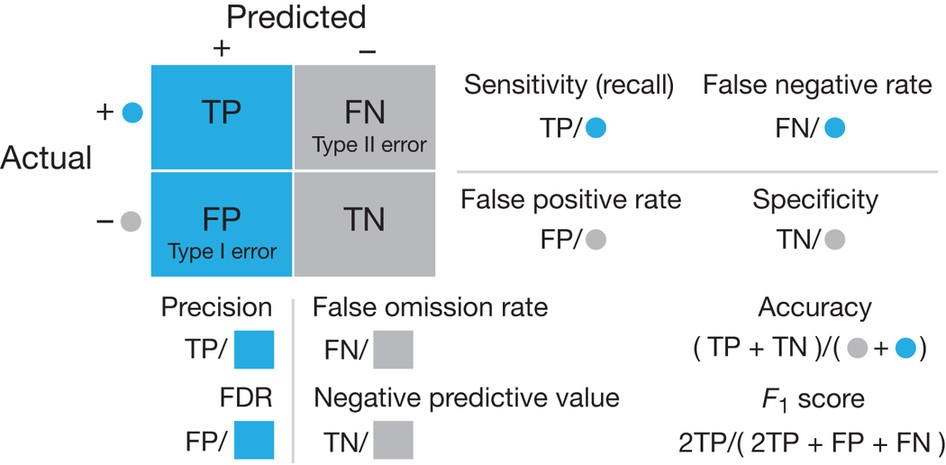

In [108]:
display(Image(filename='Evaluation Metrics.jpg'))

In [96]:
# Building the model
# Support Vector Classification
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8729411764705882
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1102
           1       0.72      0.10      0.18       173

    accuracy                           0.87      1275
   macro avg       0.80      0.55      0.56      1275
weighted avg       0.85      0.87      0.83      1275

Confusion Matrix
[[1095    7]
 [ 155   18]]
Cohen kappa score: 
0.15278917145200976


In [97]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9568627450980393
Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1102
           1       0.97      0.71      0.82       173

    accuracy                           0.96      1275
   macro avg       0.96      0.85      0.90      1275
weighted avg       0.96      0.96      0.95      1275

Confusion Matrix
[[1098    4]
 [  51  122]]
Cohen kappa score: 
0.79230160916272


In [98]:
# XGBClassifier
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01, eval_metric='logloss')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.956078431372549
Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1102
           1       0.97      0.70      0.81       173

    accuracy                           0.96      1275
   macro avg       0.96      0.85      0.89      1275
weighted avg       0.96      0.96      0.95      1275

Confusion Matrix
[[1098    4]
 [  52  121]]
Cohen kappa score: 
0.7879417879417879
